# CMPE547 Term Project

## Quantifying the Classification Uncertainty of Neural Networks through a Bayesian Perspective
### Bedirhan Çaldır 2017700036
### Atilberk Çelebi 2017700171

## Mathematical background

The idea is replacing the softmax layer of a DNN with a ReLU (or any other activation function with non-negative output) and changing the loss function in a way that it is consisting of both the output loss and a regularization term of a KL divergence to learn the uncertainty representation. Such an approach allows us to keep the regular usage of NNs (prediction) as well as modeling the uncertainty by feeding the output of the last layer (interpreted as the belief mass of the classes) to a Dirichlet as input so that the output could be evaluated to see how likely such an output is.

### Theory of Evidence
Suppose that there are $K$ outputs of an NN. Then we can write the following equality
$$u + \sum_{k = 1}^{K} b_k = 1$$
where $b_k$ corresponds to $k^{th}$ ReLU output which will be interpreted as the *belief mass* of the $k^{th}$ class and $u$ is the *uncertainty mass* of the particular outputs.

Each $b_k$ is defined as follows
$$b_k =\frac{e_k}{S}$$
where $e_k$ is the evidence of the $k^{th}$ class and $S$ is the strength of the Dirichlet we'll use and defined as 
$$S = \sum_{k = 1}^{K} (e_k + 1)$$
which leaves $u$ the following portion
$$u = \frac{K}{S}$$


Replacing $e_k + 1$ with $a_k$
$$\alpha_k = e_k + 1$$
and using the resultant simplex vector $a$ in a Dirichlet as the density
$$
D(\boldsymbol{p}|\boldsymbol{\alpha}) = \begin{cases} 
      \frac{1}{B(\boldsymbol{\alpha})} \prod_{i=1}^{K} p_i^{\alpha_i - 1} & \text{for } \boldsymbol{p} \in \mathcal{S}_K \\
      0 & \text{otherwise}
   \end{cases}
$$

As a result, we can define $\mathcal{S}_K$ as 
$$\mathcal{S}_K = \{ \boldsymbol{p} | \sum_{i=1}^K p_i = 1 \text{ and } 0 \leq p_1,...,p_K \leq 1 \}$$
and the probability of $k^{th}$ can still be calculated as
$$\hat{p}_k = \frac{\alpha_k}{S}$$

### Loss Functions

There are three different loss functions defined in the paper:

#### 1) Integrating out the class probabilities from posterior of Dirichlet prior & Multinomial likelihood - will be mentioned as *Eqn. 3* (as in the paper)

$$
\mathcal{L}_i(\Theta) =
- log ( \int \prod_{j=1}^K p_{ij}^{y_{ij}} \frac{1}{B(\alpha_i)} \prod_{j=1}^K p_{ij}^{\alpha_{ij} -1 } d\boldsymbol{p}_i )
= \sum_{j=1}^K y_{ij} (log(S_i) - log(\alpha_{ij}))
$$

#### 2) Using cross-entropy loss - will be mentioned as *Eqn. 4* (as in the paper)

$$
\mathcal{L}_i(\Theta) =
\int [\sum_{j=1}^K -y_{ij} log(p_{ij})] \frac{1}{B(\alpha_i)} \prod_{j=1}^K p_{ij}^{\alpha_{ij} -1 } d\boldsymbol{p}_i 
= \sum_{j=1}^K y_{ij} (\psi(S_i) - \psi(\alpha_{ij}))
$$

#### 3) Using sum of squares loss - will be mentioned as *Eqn. 5* (as in the paper)

$$
\mathcal{L}_i(\Theta) =
\int ||\boldsymbol{y}_i - \boldsymbol{p}_i||_2^2 \frac{1}{B(\alpha_i)} \prod_{j=1}^K p_{ij}^{\alpha_{ij} -1 } d\boldsymbol{p}_i 
= \sum_{j=1}^K \mathbb{E}[(y_{ij} - p_{ij})^2]
$$

$$
= \sum_{j=1}^K \mathbb{E}[y_{ij}^2 - 2 y_{ij}p_{ij} + p_{ij}^2] 
= \sum_{j=1}^K (y_{ij}^2 - 2 y_{ij}\mathbb{E}[p_{ij}] + \mathbb{E}[p_{ij}^2])
$$

$$
= \sum_{j=1}^K (y_{ij}^2 - 2 y_{ij}\mathbb{E}[p_{ij}] + \mathbb{E}[p_{ij}]^2 + \text{Var}(p_{ij}))
= \sum_{j=1}^K (y_{ij} - \mathbb{E}[p_{ij}])^2 + \text{Var}(p_{ij})
$$

$$
= \sum_{j=1}^K (y_{ij}^2 - 2 y_{ij}\mathbb{E}[p_{ij}] + \mathbb{E}[p_{ij}]^2 + \text{Var}(p_{ij}))
= \sum_{j=1}^K (y_{ij} - \mathbb{E}[p_{ij}])^2 + \text{Var}(p_{ij})
$$

$$
= \sum_{j=1}^K (y_{ij} - \frac{\alpha_{ij}}{S_i})^2 + \frac{\alpha_{ij}(S_i - \alpha_{ij})}{S_i^2(S_i + 1)}
$$

$$
= \sum_{j=1}^K (y_{ij} - \hat{p}_{ij})^2 + \frac{\hat{p}_{ij}(1 - \hat{p}_{ij})}{(S_i + 1)}
$$

### Regularization with KL Divergence

$$
\mathcal{L}(\Theta) = \sum_{i=1}^N \mathcal{L}_i(\Theta) + \lambda_t \sum_{i=1}^N KL[ D(\boldsymbol{p}_i|\boldsymbol{\widetilde{\alpha}}_i)||  D(\boldsymbol{p}_i|\langle 1,...,1 \rangle )]
$$

where $\lambda_t$ is annealed during the training by starting from 0 up to 1.

After the derivations, KL term turns out to be in the following form
$$
KL[ D(\boldsymbol{p}_i|\boldsymbol{\widetilde{\alpha}}_i)||  D(\boldsymbol{p}_i|\langle 1,...,1 \rangle )] = log(\frac{\Gamma(\sum_{k=1}^K \widetilde{\alpha}_{ik})}{\Gamma(K)\prod_{k=1}^K\Gamma(\widetilde{\alpha}_{ik})}) + \sum_{k=1}^K (\widetilde{\alpha}_{ik} - 1) [\psi(\widetilde{\alpha}_{ik}) - \psi(\sum_{k=1}^K \widetilde{\alpha}_{ik})]
$$

## Code

##### Import required libraries

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist.input_data import read_data_sets as mnist_data_downloader
from tensorflow.keras.datasets.cifar10 import load_data as cifar_data_downloader

import scipy.ndimage as nd
import numpy as np
from matplotlib import pyplot as plt
import pylab as pl
from IPython import display

import scipy.stats
import scipy.io

##### Download datasets

In [2]:
#get mnist dataset
mnist = mnist_data_downloader('MNIST_data', one_hot=True)

#get cifar dataset
(cifar10_x_train, cifar10_y_train), (cifar10_x_test, cifar10_y_test) = cifar_data_downloader()
cifar10_x_train = cifar10_x_train.reshape(50000, 32*32*3) / 255
cifar10_y_train = cifar10_y_train.reshape(50000)
cifar10_x_test = cifar10_x_test.reshape(10000, 32*32*3) / 255
cifar10_y_test = cifar10_y_test.reshape(10000)

cifar5_x_train = cifar10_x_train[cifar10_y_train<5,:]
cifar5_y_train = cifar10_y_train[cifar10_y_train<5]
cifar5_x_test = cifar10_x_train[cifar10_y_train>=5,:]
cifar5_y_test = cifar10_y_train[cifar10_y_train>=5]
cifar5_y_train = np.eye(5)[cifar5_y_train]
cifar5_y_test = np.eye(5)[cifar5_y_test - 5]


#download notmnist dataset
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
  
notmnist = scipy.io.loadmat("notMNIST_small.mat")
notmnist_x = np.array(notmnist["images"]).reshape(28*28,18724).transpose() / 255
notmnist_y = np.eye(10)[np.array(notmnist["labels"]).astype(int)]

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
--2019-01-08 22:58:23--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117586976 (112M) [text/plai

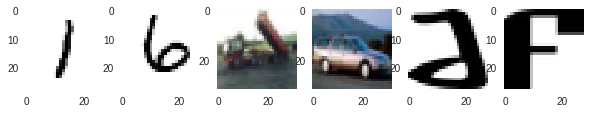

In [3]:
# display a couple of pictures from the dataset

digit = mnist.train.images[4].copy()
digit2 = mnist.train.images[222].copy()

i = 0
plt.figure(figsize=(10,10))
for image, size in ((digit, (28,28)), 
                    (digit2, (28,28)), 
                    (cifar10_x_train[2], (32,32,3)),
                    (cifar10_x_train[4], (32,32,3)),
                    (notmnist_x[1], (28, 28)),
                    (notmnist_x[10000], (28,28))):
  i+=1
  plt.subplot(1,6,i)
  plt.grid(False)
  plt.imshow(image.copy().reshape(size))

##### Utility functions

In [0]:
#### Logit to evidence converters - activation functions (they have to produce non-negative outputs for the uncertaintyuncertainity process)

def relu_evidence(logits):
    return tf.nn.relu(logits)

def exp_evidence(logits): 
    return tf.exp(logits/1000)
  
def relu6_evidence(logits):
    return tf.nn.relu6(logits)
  
def softsign_evidence(logits):
    return tf.nn.softsign(logits)

  
#### KL Divergence calculator

def KL(alpha, K):
    beta=tf.constant(np.ones((1,K)),dtype=tf.float32)
    S_alpha = tf.reduce_sum(alpha,axis=1,keepdims=True)
    
    KL = tf.reduce_sum((alpha - beta)*(tf.digamma(alpha)-tf.digamma(S_alpha)),axis=1,keepdims=True) + \
         tf.lgamma(S_alpha) - tf.reduce_sum(tf.lgamma(alpha),axis=1,keepdims=True) + \
         tf.reduce_sum(tf.lgamma(beta),axis=1,keepdims=True) - tf.lgamma(tf.reduce_sum(beta,axis=1,keepdims=True))
    return KL


##### Loss functions (there are three different one defined in the papaer)

def loss_eq5(p, alpha, K, global_step, annealing_step):
    S = tf.reduce_sum(alpha, axis=1, keepdims=True)
    loglikelihood = tf.reduce_sum((p-(alpha/S))**2, axis=1, keepdims=True) + tf.reduce_sum(alpha*(S-alpha)/(S*S*(S+1)), axis=1, keepdims=True)
    KL_reg =  tf.minimum(1.0, tf.cast(global_step/annealing_step, tf.float32)) * KL((alpha - 1)*(1-p) + 1 , K)
    return loglikelihood + KL_reg

def loss_eq4(p, alpha, K, global_step, annealing_step):
    loglikelihood = tf.reduce_mean(tf.reduce_sum(p * (tf.digamma(tf.reduce_sum(alpha, axis=1, keepdims=True)) - tf.digamma(alpha)), 1, keepdims=True))
    KL_reg =  tf.minimum(1.0, tf.cast(global_step/annealing_step, tf.float32)) * KL((alpha - 1)*(1-p) + 1 , K)
    return loglikelihood + KL_reg

def loss_eq3(p, alpha, K, global_step, annealing_step):
    loglikelihood = tf.reduce_mean(tf.reduce_sum(p * (tf.log(tf.reduce_sum(alpha, axis=1, keepdims=True)) - tf.log(alpha)), 1, keepdims=True))
    KL_reg =  tf.minimum(1.0, tf.cast(global_step/annealing_step, tf.float32)) * KL((alpha - 1)*(1-p) + 1 , K)
    return loglikelihood + KL_reg

##### Drawing functions

In [0]:
#### Graphs of total evidence & uncertainty for test/train datasets (plus their classification accuracies)

def draw_EDL_results(K, train_acc1, train_ev_s, train_ev_f, test_acc1, test_ev_s, test_ev_f): 
    # calculate uncertainty for training and testing data for correctly and misclassified samples
    train_u_succ = K / (K+np.array(train_ev_s))
    train_u_fail = K / (K+np.array(train_ev_f))
    test_u_succ  = K / (K+np.array(test_ev_s))
    test_u_fail  = K / (K+np.array(test_ev_f))
    
    f, axs = pl.subplots(2, 2)
    f.set_size_inches([10,10])
    
    axs[0,0].plot(train_ev_s,c='r',marker='+')
    axs[0,0].plot(train_ev_f,c='k',marker='x')
    axs[0,0].set_title('Train Data')
    axs[0,0].set_xlabel('Epoch')
    axs[0,0].set_ylabel('Estimated total evidence for classification') 
    axs[0,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[0,1].plot(train_u_succ,c='r',marker='+')
    axs[0,1].plot(train_u_fail,c='k',marker='x')
    axs[0,1].plot(train_acc1,c='blue',marker='*')
    axs[0,1].set_title('Train Data')
    axs[0,1].set_xlabel('Epoch')
    axs[0,1].set_ylabel('Estimated uncertainty for classification')
    axs[0,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    
    axs[1,0].plot(test_ev_s,c='r',marker='+')
    axs[1,0].plot(test_ev_f,c='k',marker='x')
    axs[1,0].set_title('Test Data')
    axs[1,0].set_xlabel('Epoch')
    axs[1,0].set_ylabel('Estimated total evidence for classification') 
    axs[1,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[1,1].plot(test_u_succ,c='r',marker='+')
    axs[1,1].plot(test_u_fail,c='k',marker='x')
    axs[1,1].plot(test_acc1,c='blue',marker='*')
    axs[1,1].set_title('Test Data')
    axs[1,1].set_xlabel('Epoch')
    axs[1,1].set_ylabel('Estimated uncertainty for classification')
    axs[1,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    
    plt.show()

    
#### Graph for image rotation experiment

def rotating_image_classification(img, sess, prob, X, keep_prob, K, uncertainty=None, dims=(28,28), threshold=0.25, c=['black','blue','brown','purple','cyan','red'], marker=['s','^','o']*2):
    Mdeg = 180 
    Ndeg = Mdeg//10+1
    ldeg = []
    lp = []
    lu = []
    scores = np.zeros((1, K))
    rot_imgs = np.zeros((dims[0], dims[1]*Ndeg))
    for i,deg in enumerate(np.linspace(0, Mdeg, Ndeg)):
        rot_img = nd.rotate(img.reshape(*dims), deg, reshape=False).reshape(*dims)
        rot_img = np.clip(a=rot_img, a_min=0, a_max=1)
        rot_imgs[:,i*dims[1]:(i+1)*dims[1]] = 1 - rot_img
        feed_dict={X:rot_img.reshape(1,-1), keep_prob:1.0}
        if uncertainty is None:
            p_pred_t = sess.run(prob, feed_dict=feed_dict)
        else:
            p_pred_t,u = sess.run([prob,uncertainty], feed_dict=feed_dict)
            lu.append(u.mean())
        scores += p_pred_t >= threshold
        ldeg.append(deg) 
        lp.append(p_pred_t[0])
    
    labels = np.arange(K)[scores[0].astype(bool)]
    lp = np.array(lp)[:,labels]
    labels = labels.tolist()
    
    plt.figure(figsize=[6,6])
    for i in range(len(labels)):
        plt.plot(ldeg, lp[:,i], marker=marker[i], c=c[i])
    
    if uncertainty is not None:
        labels += ['uncertainty']
        plt.plot(ldeg,lu,marker='<',c='red')
        
    plt.legend(labels)
 
    plt.xlim([0,Mdeg])  
    plt.xlabel('Rotation Degree')
    plt.ylabel('Classification Probability')
    plt.show()

    plt.figure(figsize=[6.4,100])
    plt.imshow(rot_imgs,cmap='gray')
    plt.axis('off')
    plt.show()

### Models

##### LeNet with softmax cross entropy loss function

In [0]:
def var(name, shape, init=None):
    init = tf.truncated_normal_initializer(stddev=(2/shape[0])**0.5) if init is None else init
    return tf.get_variable(name=name, shape=shape, dtype=tf.float32, initializer=init)

def LeNet_softmax(K, lmb=0.005, dims=(28,28), nch=1): 
    g = tf.Graph()
    with g.as_default():
        X = tf.placeholder(shape=[None,np.prod(dims)*nch], dtype=tf.float32)
        Y = tf.placeholder(shape=[None,K], dtype=tf.float32)
        keep_prob = tf.placeholder(dtype=tf.float32)
        
        W1 = var('W1', [5,5,nch,20])
        b1 = var('b1', [20])
        c1 = tf.nn.conv2d(tf.reshape(X, [-1, *dims, nch]), W1, [1, 1, 1, 1], 'SAME')
        r1 = tf.nn.relu(c1 + b1)
        out1 = tf.nn.max_pool(r1, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')
        
        W2 = var('W2', [5,5,20,50])
        b2 = var('b2', [50])
        c2 = tf.nn.conv2d(out1, W2, [1, 1, 1, 1], 'SAME')
        r2 = tf.nn.relu(c2 + b2)
        out2 = tf.nn.max_pool(r2, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')
        
        Xflat = tf.contrib.layers.flatten(out2)

        W3 = var('W3', [Xflat.get_shape()[1].value, 500])
        b3 = var('b3', [500]) 
        out3 = tf.nn.relu(tf.matmul(Xflat, W3) + b3)
        out3 = tf.nn.dropout(out3, keep_prob=keep_prob)

        W4 = var('W4', [500,K])
        b4 = var('b4', [K])
        logits = tf.matmul(out3, W4) + b4
        
        prob = tf.nn.softmax(logits=logits) 
        
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
        l2_loss = (tf.nn.l2_loss(W3)+tf.nn.l2_loss(W4)) * lmb
        
        step = tf.train.AdamOptimizer().minimize(loss + l2_loss)
        
        acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(prob, 1), tf.argmax(Y, 1)), tf.float32))
        
        return g, step, X, Y, keep_prob, prob, acc, loss

##### LeNet with expected mean square error loss

In [0]:
def var(name, shape, init=None):
    init = tf.truncated_normal_initializer(stddev=(2/shape[0])**0.5) if init is None else init
    return tf.get_variable(name=name, shape=shape, dtype=tf.float32, initializer=init)
  
def LeNet_EDL(K, loss_function, logits2evidence=relu_evidence, lmb=0.005, dims=(28,28), nch=1):
    g = tf.Graph()
    with g.as_default():
        X = tf.placeholder(shape=[None,np.prod(dims)*nch], dtype=tf.float32)
        Y = tf.placeholder(shape=[None,K], dtype=tf.float32)
        keep_prob = tf.placeholder(dtype=tf.float32)
        global_step = tf.Variable(initial_value=0, name='global_step', trainable=False)
        annealing_step = tf.placeholder(dtype=tf.int32) 
    
        W1 = var('W1', [5,5,nch,20])
        b1 = var('b1', [20])
        c1 = tf.nn.conv2d(tf.reshape(X, [-1, *dims, nch]), W1, [1, 1, 1, 1], 'SAME')
        r1 = tf.nn.relu(c1 + b1)
        out1 = tf.nn.max_pool(r1, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')
        
        W2 = var('W2', [5,5,20,50])
        b2 = var('b2', [50])
        c2 = tf.nn.conv2d(out1, W2, [1, 1, 1, 1], 'SAME')
        r2 = tf.nn.relu(c2 + b2)
        out2 = tf.nn.max_pool(r2, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')

        Xflat = tf.contrib.layers.flatten(out2)

        W3 = var('W3', [Xflat.get_shape()[1].value, 500])
        b3 = var('b3', [500]) 
        out3 = tf.nn.relu(tf.matmul(Xflat, W3) + b3)
        out3 = tf.nn.dropout(out3, keep_prob=keep_prob)

        W4 = var('W4', [500,K])
        b4 = var('b4', [K])
        logits = tf.matmul(out3, W4) + b4
        
        evidence = logits2evidence(logits)
        alpha = evidence + 1
        
        u = K / tf.reduce_sum(alpha, axis=1, keepdims=True)
        
        prob = alpha/tf.reduce_sum(alpha, 1, keepdims=True) 
        
        loss = tf.reduce_mean(loss_function(Y, alpha, K, global_step, annealing_step))
        l2_loss = (tf.nn.l2_loss(W3)+tf.nn.l2_loss(W4)) * lmb
        
        step = tf.train.AdamOptimizer().minimize(loss + l2_loss, global_step=global_step)
        
        match = tf.reshape(tf.cast(tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1)), tf.float32),(-1,1))
        acc = tf.reduce_mean(match)
        
        total_evidence = tf.reduce_sum(evidence,1, keepdims=True) 
        mean_ev = tf.reduce_mean(total_evidence)
        mean_ev_succ = tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*match) / tf.reduce_sum(match+1e-20)
        mean_ev_fail = tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*(1-match)) / (tf.reduce_sum(tf.abs(1-match))+1e-20) 
        
        return g, step, X, Y, annealing_step, keep_prob, prob, acc, loss, u, evidence, mean_ev, mean_ev_succ, mean_ev_fail

### Model trainings and testings

##### Only Softmax (Regular LeNet)

In [8]:
g, step, X, Y, keep_prob, prob, acc, loss = LeNet_softmax(K=10)
sess = tf.Session(graph=g)
with g.as_default(): 
    sess.run(tf.global_variables_initializer())

epoch = 50
bsize = 1000
n_batches = mnist.train.num_examples // bsize
for e in range(epoch):   
    for i in range(n_batches):
        data, label = mnist.train.next_batch(bsize)
        sess.run(step, {X:data, Y:label, keep_prob:.5})
        print('epoch %d - %d%%) '% (e+1, (100*(i+1))//n_batches), end='\r' if i<n_batches-1 else '')
        
    train_acc = sess.run(acc, feed_dict={X:mnist.train.images, Y:mnist.train.labels, keep_prob:1.})
    test_acc = sess.run(acc, feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1.})
    
    print('training accuracy: %2.4f \t testing accuracy: %2.4f' % (train_acc, test_acc))

epoch 1 - 100%) training accuracy: 0.9191 	 testing accuracy: 0.9246
epoch 2 - 100%) training accuracy: 0.9515 	 testing accuracy: 0.9547
epoch 3 - 100%) training accuracy: 0.9663 	 testing accuracy: 0.9653
epoch 4 - 100%) training accuracy: 0.9730 	 testing accuracy: 0.9701
epoch 5 - 100%) training accuracy: 0.9770 	 testing accuracy: 0.9737
epoch 6 - 100%) training accuracy: 0.9798 	 testing accuracy: 0.9764
epoch 7 - 100%) training accuracy: 0.9818 	 testing accuracy: 0.9773
epoch 8 - 100%) training accuracy: 0.9829 	 testing accuracy: 0.9776
epoch 9 - 100%) training accuracy: 0.9836 	 testing accuracy: 0.9783
epoch 10 - 100%) training accuracy: 0.9866 	 testing accuracy: 0.9815
epoch 11 - 100%) training accuracy: 0.9869 	 testing accuracy: 0.9819
epoch 12 - 100%) training accuracy: 0.9879 	 testing accuracy: 0.9818
epoch 13 - 100%) training accuracy: 0.9877 	 testing accuracy: 0.9835
epoch 14 - 100%) training accuracy: 0.9891 	 testing accuracy: 0.9840
epoch 15 - 100%) training acc

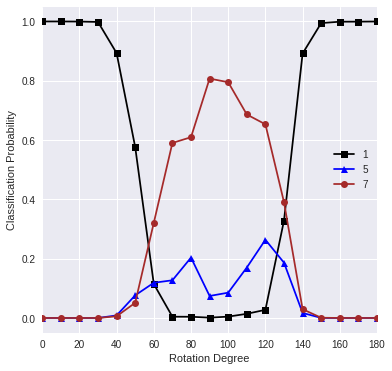

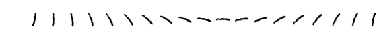

In [9]:
rotating_image_classification(digit, sess, prob, X, keep_prob, 10)

In [0]:
nm_p_sm = sess.run(prob, feed_dict={X:notmnist_x,Y:notmnist_y,keep_prob:1.}).copy()
entropies_sm = [scipy.stats.entropy(nm_p_sm[i,:]) for i in range(nm_p_sm.shape[0])]

As you see, the model fails when a **training** data is started to be rotated. It predicts the correct class up to 5-10 degrees, and then starts to fail to assign that specific class as the output. The dramatic part of this failure starts with assigning another class instead of the correct class since regular NNs like this LeNet implementation should always produce a class label as the output as it does not have any other option. As the sample rotated, the assigned class changes sometimes even multiple times. This example shows how the network fails handling an out-of-distribution sample. Another example could be using a nonMNIST data as the test sample where the NN would fail again by saying "3" or "5" or any other digit to a non-digit sample.

These type of failures are stated as out-of-distribution failures in the paper. One other failure is shown where the input is from the distribution, but it's distorted in a special way so that it is completely normal to a human whereas the network interprets it as a completely irrelevant class with >99% accuracy. An example can be shown below

![alt text](https://cdn-images-1.medium.com/max/1600/1*UaT0JqkxrlTgNc5XSrNrwg.png)

Here, when an image of digit 9 is rotated, it will be stated to be recognized as 5, 8 or some other digit until it is rotated 180 degrees which corresponds to digit 6 as expected. Below, the proposed network (training an uncertainty as well, with the proposed different loss functions) will be used to overcome uncertainty issue explained.

##### Using the Expected Mean Square Error (Eq. 5)

In [11]:
g, step, X, Y, annealing_step, keep_prob, prob, acc, loss, u, evidence, mean_ev, mean_ev_succ, mean_ev_fail= LeNet_EDL(10, loss_eq5, relu_evidence)
sess = tf.Session(graph=g)
with g.as_default():
    sess.run(tf.global_variables_initializer())
    
epoch = 50
bsize = 1000
n_batches = mnist.train.num_examples // bsize
L_train_acc=[]
L_train_ev_s=[]
L_train_ev_f=[]
L_test_acc=[]
L_test_ev_s=[]
L_test_ev_f=[]
for e in range(epoch):   
    for i in range(n_batches):
        data, label = mnist.train.next_batch(bsize)
        sess.run(step, feed_dict={X:data, Y:label, keep_prob:.5, annealing_step:10*n_batches})
        print('epoch %d - %d%%) '% (e+1, (100*(i+1))//n_batches), end='\r' if i<n_batches-1 else '')
        
    train_acc, train_succ, train_fail = sess.run([acc,mean_ev_succ,mean_ev_fail], feed_dict={X:mnist.train.images, Y:mnist.train.labels, keep_prob:1.})
    test_acc, test_succ, test_fail = sess.run([acc,mean_ev_succ,mean_ev_fail], feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1.})
    
    L_train_acc.append(train_acc)
    L_train_ev_s.append(train_succ)
    L_train_ev_f.append(train_fail)
    
    L_test_acc.append(test_acc)
    L_test_ev_s.append(test_succ)
    L_test_ev_f.append(test_fail)
    
    print('training: %2.4f (%2.4f - %2.4f) \t testing: %2.4f (%2.4f - %2.4f)' % 
          (train_acc, train_succ, train_fail, test_acc, test_succ, test_fail))

epoch 1 - 100%) training: 0.9487 (31.9112 - 8.5118) 	 testing: 0.9516 (32.3773 - 8.6958)
epoch 2 - 100%) training: 0.9685 (33.0216 - 5.1034) 	 testing: 0.9713 (33.4297 - 5.1674)
epoch 3 - 100%) training: 0.9726 (35.0159 - 4.5514) 	 testing: 0.9732 (35.5044 - 4.6598)
epoch 4 - 100%) training: 0.9769 (35.5925 - 3.1907) 	 testing: 0.9763 (36.1037 - 3.6532)
epoch 5 - 100%) training: 0.9788 (37.5390 - 3.4017) 	 testing: 0.9787 (38.1474 - 3.7462)
epoch 6 - 100%) training: 0.9802 (38.1618 - 2.8083) 	 testing: 0.9792 (38.9665 - 3.2041)
epoch 7 - 100%) training: 0.9803 (39.4684 - 2.8174) 	 testing: 0.9800 (40.2674 - 2.6957)
epoch 8 - 100%) training: 0.9815 (37.9524 - 2.1169) 	 testing: 0.9808 (38.6940 - 1.9887)
epoch 9 - 100%) training: 0.9815 (39.0468 - 2.4792) 	 testing: 0.9797 (39.8694 - 2.6566)
epoch 10 - 100%) training: 0.9827 (39.6326 - 1.4786) 	 testing: 0.9822 (40.4484 - 2.1092)
epoch 11 - 100%) training: 0.9838 (38.4500 - 1.2349) 	 testing: 0.9815 (39.2737 - 1.3906)
epoch 12 - 100%) tr

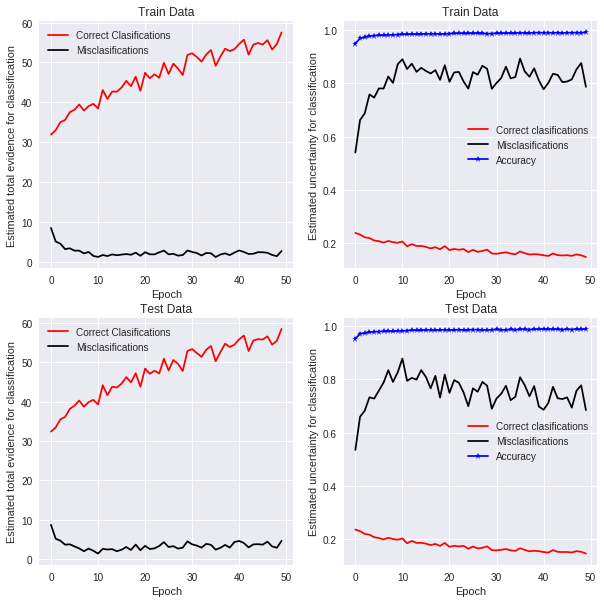

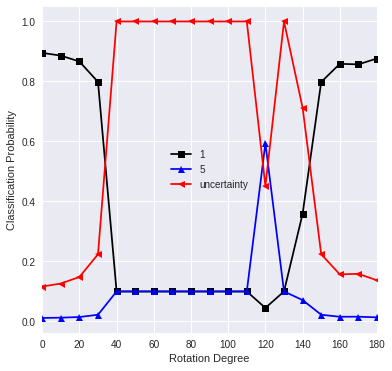

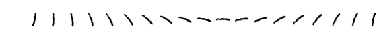

In [12]:
draw_EDL_results(10, L_train_acc, L_train_ev_s, L_train_ev_f, L_test_acc, L_test_ev_s, L_test_ev_f)
rotating_image_classification(digit, sess, prob, X, keep_prob, 10, u)

As you see, the network now starts to say "*I don't know*" to the examples of out-of-distribution with very high probabilities.

Let us test the standard Softmax and EDL models' uncertainty assignment ability by testing the model trained on MNIST with notMNIST dataset.
We look at the entropies of the predictive probabilities when model is fed with out-of-distribution data. We expect the expected entropy to be high (curve closer to bottom right corner is better)

In [0]:
nm_p_edl1 = sess.run(prob, feed_dict={X:notmnist_x,Y:notmnist_y,keep_prob:1.}).copy()
entropies_edl1 = [scipy.stats.entropy(nm_p_edl1[i,:]) for i in range(nm_p_edl1.shape[0])]

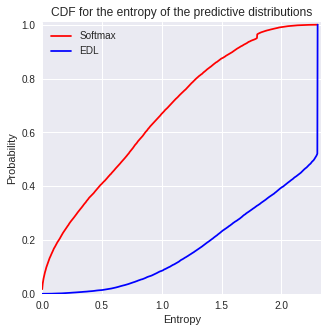

In [14]:
cdf_sm = np.histogram(entropies_sm, bins=1000)[0];
cdf_sm = cdf_sm / np.sum(cdf_sm)
cdf_sm = np.cumsum(cdf_sm)
cdf_edl1 = np.histogram(entropies_edl1,bins=1000)[0];
cdf_edl1 = cdf_edl1 / np.sum(cdf_edl1)
cdf_edl1 = np.cumsum(cdf_edl1)
xaxs= np.linspace(0,np.log(10),1000)
plt.figure(figsize=(5,5))
plt.plot(xaxs,cdf_sm,label="Softmax", color='r')
plt.plot(xaxs,cdf_edl1, label="EDL", color="b")
plt.legend(loc='upper left')
plt.xlim(0,np.log(10)+0.03)
plt.ylim(0,1.01)
plt.xlabel("Entropy")
plt.ylabel("Probability")
plt.title("CDF for the entropy of the predictive distributions")
plt.show()

In [15]:
g, step, X, Y, keep_prob, prob, acc, loss = LeNet_softmax(K=5, dims=(32,32), nch=3)
sess = tf.Session(graph=g)
with g.as_default(): 
    sess.run(tf.global_variables_initializer())

epoch = 50
bsize = 1000
n_batches = cifar5_x_train.shape[0] // bsize
for e in range(epoch):   
    train_acc = 0.
    for i in range(n_batches):
        data = cifar5_x_train[i*bsize:min((i+1)*bsize, cifar5_x_train.shape[0]),:]
        label = cifar5_y_train[i*bsize:min((i+1)*bsize, cifar5_y_train.shape[0]),:]
        sess.run(step, {X:data, Y:label, keep_prob:.9})
        accur=sess.run(acc, {X:data, Y:label, keep_prob:1.})
        train_acc += accur
        print('epoch %d - %d%%) '% (e+1, (100*(i+1))//n_batches), end='\r' if i<n_batches-1 else '')
    
    print('training accuracy: %2.4f' % (train_acc / n_batches , ))

epoch 1 - 100%) training accuracy: 0.2333
epoch 2 - 100%) training accuracy: 0.3722
epoch 3 - 100%) training accuracy: 0.3820
epoch 4 - 100%) training accuracy: 0.4417
epoch 5 - 100%) training accuracy: 0.4956
epoch 6 - 100%) training accuracy: 0.5276
epoch 7 - 100%) training accuracy: 0.5481
epoch 8 - 100%) training accuracy: 0.5662
epoch 9 - 100%) training accuracy: 0.5870
epoch 10 - 100%) training accuracy: 0.6033
epoch 11 - 100%) training accuracy: 0.6149
epoch 12 - 100%) training accuracy: 0.6291
epoch 13 - 100%) training accuracy: 0.6414
epoch 14 - 100%) training accuracy: 0.6472
epoch 15 - 100%) training accuracy: 0.6564
epoch 16 - 100%) training accuracy: 0.6626
epoch 17 - 100%) training accuracy: 0.6700
epoch 18 - 100%) training accuracy: 0.6727
epoch 19 - 100%) training accuracy: 0.6832
epoch 20 - 100%) training accuracy: 0.6805
epoch 21 - 100%) training accuracy: 0.6892
epoch 22 - 100%) training accuracy: 0.7032
epoch 23 - 100%) training accuracy: 0.7100
epoch 24 - 100%) tra

In [0]:
entropies_c5_sm = []
for i in range(10):
  nm_p_c5_sm = sess.run(prob, feed_dict={X:cifar5_x_test[i*2500:(i+1)*2500],Y:cifar5_y_test[i*2500:(i+1)*2500],keep_prob:1.}).copy()
  entropies_c5_sm += [scipy.stats.entropy(nm_p_c5_sm[i,:]) for i in range(2500)]

In [18]:
g, step, X, Y, annealing_step, keep_prob, prob, acc, loss, u, evidence, mean_ev, mean_ev_succ, mean_ev_fail= LeNet_EDL(5, loss_eq5, relu_evidence, dims=(32,32), nch=3)
sess = tf.Session(graph=g)
with g.as_default():
    sess.run(tf.global_variables_initializer())
    
epoch = 50
bsize = 1000
n_batches = cifar5_x_train.shape[0] // bsize
for e in range(epoch):   
    train_acc = 0.
    for i in range(n_batches):
        data = cifar5_x_train[i*bsize:min((i+1)*bsize, cifar5_x_train.shape[0]),:]
        label = cifar5_y_train[i*bsize:min((i+1)*bsize, cifar5_y_train.shape[0]),:]
        sess.run(step, feed_dict={X:data, Y:label, keep_prob:.9, annealing_step:50*n_batches})
        accur = sess.run(acc, feed_dict={X:data, Y:label, keep_prob:1.})
        train_acc += accur
        print('epoch %d - %d%%) '% (e+1, (100*(i+1))//n_batches), end='\r' if i<n_batches-1 else '')
        
    print('training: %2.4f' % 
          (train_acc / n_batches, ))

epoch 1 - 100%) training: 0.2248
epoch 2 - 100%) training: 0.2883
epoch 3 - 100%) training: 0.2043
epoch 4 - 100%) training: 0.2394
epoch 5 - 100%) training: 0.2820
epoch 6 - 100%) training: 0.3174
epoch 7 - 100%) training: 0.3594
epoch 8 - 100%) training: 0.3843
epoch 9 - 100%) training: 0.4114
epoch 10 - 100%) training: 0.4285
epoch 11 - 100%) training: 0.4473
epoch 12 - 100%) training: 0.4406
epoch 13 - 100%) training: 0.4686
epoch 14 - 100%) training: 0.4569
epoch 15 - 100%) training: 0.4905
epoch 16 - 100%) training: 0.5052
epoch 17 - 100%) training: 0.5289
epoch 18 - 100%) training: 0.5425
epoch 19 - 100%) training: 0.5673
epoch 20 - 100%) training: 0.5878
epoch 21 - 100%) training: 0.6030
epoch 22 - 100%) training: 0.5919
epoch 23 - 100%) training: 0.6250
epoch 24 - 100%) training: 0.6398
epoch 25 - 100%) training: 0.6494
epoch 26 - 100%) training: 0.6610
epoch 27 - 100%) training: 0.6648
epoch 28 - 100%) training: 0.6613
epoch 29 - 100%) training: 0.6740
epoch 30 - 100%) traini

In [0]:
entropies_c5_edl1 = []
for i in range(10):
  nm_p_c5_edl1 = sess.run(prob, feed_dict={X:cifar5_x_test[i*2500:(i+1)*2500],Y:cifar5_y_test[i*2500:(i+1)*2500],keep_prob:1.}).copy()
  entropies_c5_edl1 += [scipy.stats.entropy(nm_p_c5_edl1[i,:]) for i in range(2500)]

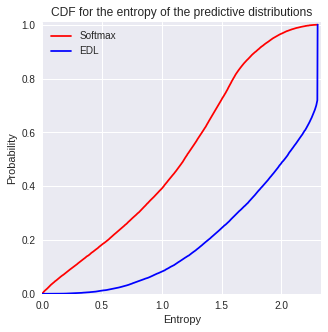

In [20]:
cdf_sm = np.histogram(entropies_c5_sm, bins=1000)[0];
cdf_sm = cdf_sm / np.sum(cdf_sm)
cdf_sm = np.cumsum(cdf_sm)
cdf_edl1 = np.histogram(entropies_c5_edl1,bins=1000)[0];
cdf_edl1 = cdf_edl1 / np.sum(cdf_edl1)
cdf_edl1 = np.cumsum(cdf_edl1)
xaxs= np.linspace(0,np.log(10),1000)
plt.figure(figsize=(5,5))
plt.plot(xaxs,cdf_sm,label="Softmax", color='r')
plt.plot(xaxs,cdf_edl1, label="EDL", color="b")
plt.legend(loc='upper left')
plt.xlim(0,np.log(10)+0.03)
plt.ylim(0,1.01)
plt.xlabel("Entropy")
plt.ylabel("Probability")
plt.title("CDF for the entropy of the predictive distributions")
plt.show()

In above plot, we see the CDFs of entropies of Softmax and EDL models trained with the first 5 classes of CIFAR10 dataset and tested with the last 5 classes (out-of-distribution). Again we observe that EDL yields higher entropy for these instances

##### Using the Expected Cross Entropy (Eq. 4)

In [21]:
g, step, X, Y, annealing_step, keep_prob, prob, acc, loss, u, evidence, mean_ev, mean_ev_succ, mean_ev_fail = LeNet_EDL(10, loss_eq4, exp_evidence, lmb=0.001)
sess = tf.Session(graph=g)
with g.as_default():
    sess.run(tf.global_variables_initializer())

epoch = 50
bsize = 1000
n_batches = mnist.train.num_examples // bsize
L_train_acc=[]
L_train_ev_s=[]
L_train_ev_f=[]
L_test_acc=[]
L_test_ev_s=[]
L_test_ev_f=[]
for e in range(epoch):   
    for i in range(n_batches):
        data, label = mnist.train.next_batch(bsize)
        sess.run(step,feed_dict={X:data, Y:label, keep_prob:.5, annealing_step:10*n_batches})
        print('epoch %d - %d%%) '% (e+1, (100*(i+1))//n_batches), end='\r' if i<n_batches-1 else '')
        
    train_acc, train_succ, train_fail = sess.run([acc, mean_ev_succ, mean_ev_fail], feed_dict={X:mnist.train.images, Y:mnist.train.labels, keep_prob:1.})
    test_acc, test_succ, test_fail = sess.run([acc, mean_ev_succ, mean_ev_fail], feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1.})
    
    L_train_acc.append(train_acc)
    L_train_ev_s.append(train_succ)
    L_train_ev_f.append(train_fail)
    
    L_test_acc.append(test_acc)
    L_test_ev_s.append(test_succ)
    L_test_ev_f.append(test_fail)
    
    print('training: %2.4f (%2.4f - %2.4f) \t testing: %2.4f (%2.4f - %2.4f)' % 
          (train_acc, train_succ, train_fail, test_acc, test_succ, test_fail))

epoch 1 - 100%) training: 0.8040 (36.3870 - 18.6579) 	 testing: 0.8186 (36.5678 - 18.8842)
epoch 2 - 100%) training: 0.9065 (80.6729 - 9.7785) 	 testing: 0.9141 (81.9839 - 9.8556)
epoch 3 - 100%) training: 0.9295 (148.3072 - 8.7702) 	 testing: 0.9354 (149.9818 - 8.5185)
epoch 4 - 100%) training: 0.9418 (223.4681 - 7.5654) 	 testing: 0.9461 (224.7725 - 7.3851)
epoch 5 - 100%) training: 0.9523 (299.9962 - 7.4280) 	 testing: 0.9580 (302.9896 - 7.0703)
epoch 6 - 100%) training: 0.9591 (333.0509 - 5.6245) 	 testing: 0.9638 (341.0638 - 5.0107)
epoch 7 - 100%) training: 0.9622 (472.8813 - 6.6511) 	 testing: 0.9669 (466.9874 - 6.0762)
epoch 8 - 100%) training: 0.9664 (593.7644 - 5.8886) 	 testing: 0.9706 (605.1547 - 4.7428)
epoch 9 - 100%) training: 0.9666 (665.8698 - 5.4321) 	 testing: 0.9691 (686.0248 - 4.3354)
epoch 10 - 100%) training: 0.9693 (908.4888 - 4.5076) 	 testing: 0.9725 (910.9100 - 4.1159)
epoch 11 - 100%) training: 0.9719 (1016.5170 - 5.0778) 	 testing: 0.9740 (1034.1918 - 4.459

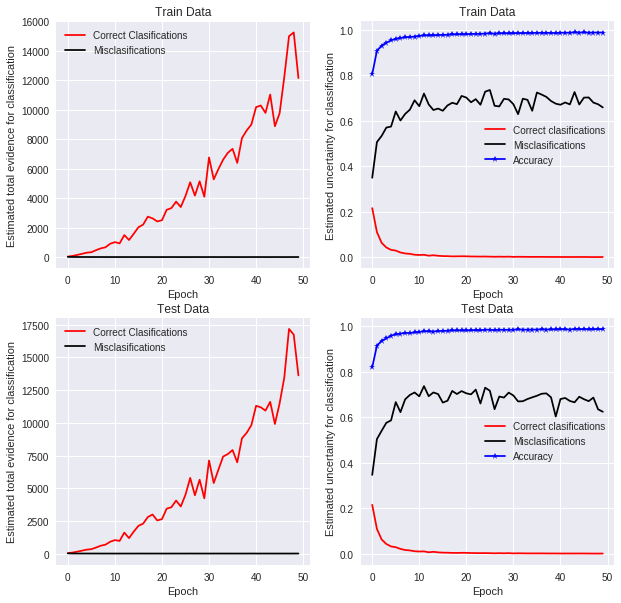

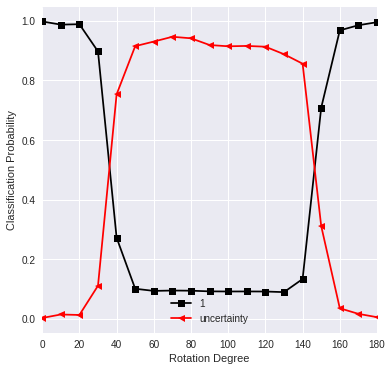

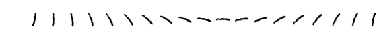

In [22]:
draw_EDL_results(10, L_train_acc, L_train_ev_s, L_train_ev_f, L_test_acc, L_test_ev_s, L_test_ev_f)
rotating_image_classification(digit, sess, prob, X, keep_prob, 10, u)

##### Using Negative Log of the Expected Likelihood (Eq. 3)

In [23]:
g, step, X, Y, annealing_step, keep_prob, prob, acc, loss, u, evidence, mean_ev, mean_ev_succ, mean_ev_fail = LeNet_EDL(10, loss_eq3, exp_evidence, lmb=0.001)
sess = tf.Session(graph=g)
with g.as_default():
    sess.run(tf.global_variables_initializer())

epoch = 50
bsize = 1000
n_batches = mnist.train.num_examples // bsize
L_train_acc=[]
L_train_ev_s=[]
L_train_ev_f=[]
L_test_acc=[]
L_test_ev_s=[]
L_test_ev_f=[]
for e in range(epoch):   
    for i in range(n_batches):
        data, label = mnist.train.next_batch(bsize)
        sess.run(step, feed_dict={X:data, Y:label, keep_prob:.5, annealing_step:10*n_batches})
        print('epoch %d - %d%%) '% (e+1, (100*(i+1))//n_batches), end='\r' if i<n_batches-1 else '')
        
    train_acc, train_succ, train_fail = sess.run([acc, mean_ev_succ, mean_ev_fail], feed_dict={X:mnist.train.images, Y:mnist.train.labels, keep_prob:1.})
    test_acc, test_succ, test_fail = sess.run([acc, mean_ev_succ, mean_ev_fail], feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1.})
    
    L_train_acc.append(train_acc)
    L_train_ev_s.append(train_succ)
    L_train_ev_f.append(train_fail)
    
    L_test_acc.append(test_acc)
    L_test_ev_s.append(test_succ)
    L_test_ev_f.append(test_fail)
    
    print('training: %2.4f (%2.4f - %2.4f) \t testing: %2.4f (%2.4f - %2.4f)' % 
          (train_acc, train_succ, train_fail, test_acc, test_succ, test_fail))

epoch 1 - 100%) training: 0.7962 (38.7569 - 13.1803) 	 testing: 0.8106 (39.2335 - 13.2792)
epoch 2 - 100%) training: 0.9008 (84.4532 - 8.8564) 	 testing: 0.9124 (85.7668 - 8.8523)
epoch 3 - 100%) training: 0.9265 (191.4590 - 7.9041) 	 testing: 0.9324 (190.9509 - 7.8571)
epoch 4 - 100%) training: 0.9426 (293.1922 - 7.7457) 	 testing: 0.9472 (295.6591 - 7.1431)
epoch 5 - 100%) training: 0.9507 (359.9416 - 6.4889) 	 testing: 0.9550 (365.6177 - 5.9425)
epoch 6 - 100%) training: 0.9540 (569.4575 - 6.3502) 	 testing: 0.9572 (577.6477 - 5.9247)
epoch 7 - 100%) training: 0.9600 (464.9307 - 5.4432) 	 testing: 0.9624 (476.7494 - 5.0312)
epoch 8 - 100%) training: 0.9654 (751.2396 - 5.9604) 	 testing: 0.9683 (741.4438 - 5.6497)
epoch 9 - 100%) training: 0.9665 (733.9351 - 3.9610) 	 testing: 0.9708 (743.8257 - 3.7482)
epoch 10 - 100%) training: 0.9683 (1217.0190 - 5.1231) 	 testing: 0.9727 (1195.6746 - 4.8417)
epoch 11 - 100%) training: 0.9697 (1473.1058 - 4.8121) 	 testing: 0.9723 (1565.9117 - 4.7

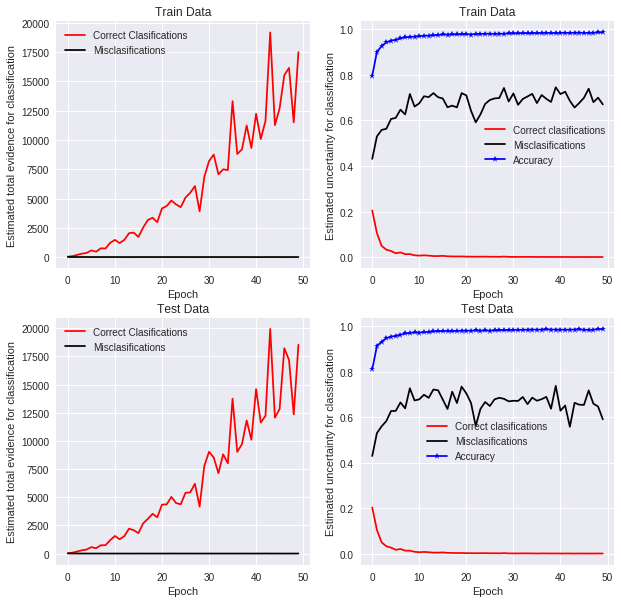

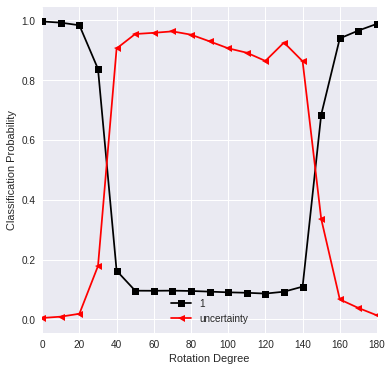

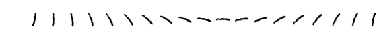

In [24]:
draw_EDL_results(10, L_train_acc, L_train_ev_s, L_train_ev_f, L_test_acc, L_test_ev_s, L_test_ev_f)
rotating_image_classification(digit, sess, prob, X, keep_prob, 10, u)